<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp25-notes/blob/main/Day17_Stochastic_Gradient_Descent_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day17
## Gradient Descent

#### CS167: Machine Learning, Spring 2025


📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp25/cs167_syllabus_sp25.pdf)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Gradient Descent

The __gradient descent__ trainig rule is guaranteed to converge to the model with minimum squared error (proven using calculus)
- given sufficiently small learning rate
- even when training data contains noise
- even when training data is not linearly separable.

# Gradient Descent

Gradient descent updates the weight values until it has accumulated the changes $\Delta w$s __for all training examples__ on each epoch.
- perceptron updates them after putting each training examples through the unit.

__Guaranteed to converge__ to model with minimum squared error
- given sufficiently small learning rate
- even when training data contains noise
- even when the training data is not linearly separable.

In practice Gradient Descent has some issues:
- it is __computationally heavy__ which means it can be pretty slow
- could get stuck in a __local minima__


# Stochastic Gradient Descent

In practie, __Gradient Descent__ has some issues:
- if therea re a large number of training examples, Gradient Descent doesn't work well
- could get stuck in a __local minima__


__Stochastic Gradient Descent (SGD)__:
- Instead of using the entire dataset to calcuate gradients and make the next move...
- SGD tries to find minimums by iteration from __small subset of randomly picked training examples__
    - can converge faster; can escape local minimum.
    - it can be pretty noisy, but given enough iterations, it works pretty well.

# Boston Housing Dataset:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [ ]:
#boston housing dataset
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas
path = '/content/drive/MyDrive/cs167_sp25/datasets/boston_housing.csv'
data = pandas.read_csv(path)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


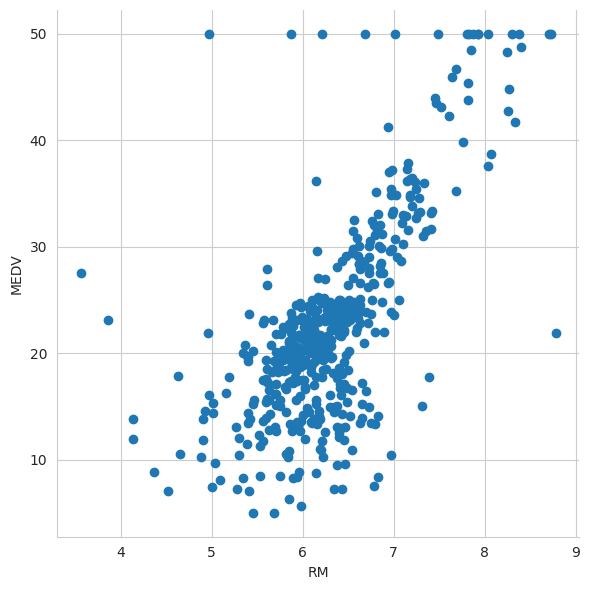

In [ ]:
## Play around with plotting different predictor variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.FacetGrid(data,height = 6).map(plt.scatter,'RM','MEDV')

# 💬 Goup Exercise:

- Find a Gradient Descent Algorithm on scikit-learn
  - Hint: Stochastic Gradient Descent (SGD)
- Apply it to the Boston Housing Market Dataset
- Utilize a metric to determine how well the algorithm is doing
- Consider reading the user's guide if the results don't make sense

In [ ]:
# Code using SGD on Boston Housing Dataset:
#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDRegressor


# load data
path = '/content/drive/MyDrive/cs167_sp25/datasets/boston_housing.csv'
housing_data = pandas.read_csv(path)
# clean the data
housing_data['CRIM'].fillna(housing_data['CRIM'].mean(),inplace=True)
housing_data['ZN'].fillna(housing_data['ZN'].mean(),inplace=True)
housing_data['INDUS'].fillna(housing_data['INDUS'].mean(),inplace=True)
housing_data['CHAS'].fillna(housing_data['CHAS'].mean(),inplace=True)
housing_data['AGE'].fillna(housing_data['AGE'].mean(),inplace=True)
housing_data['LSTAT'].fillna(housing_data['LSTAT'].mean(),inplace=True)

# Split the data into the training data and testing data
target= 'MEDV'
predictors = housing_data.columns.drop(target) # use all of the columns except for MEDV
train_data, test_data, train_sln, test_sln = train_test_split(housing_data[predictors], housing_data[target], test_size = 0.2, random_state=41)

#load up scikit-learn SGDregressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(train_data, train_sln)
predictions = sgd.predict(test_data)

# output performance (finish the rest)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



Results might be pretty bad. Explore what's going on here.

- [`sklearn` User Guide on Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/sgd.html#)
- Documentation: [`sklearn.linear_model.SGDRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [ ]:
# normalize the data
from sklearn.preprocessing import StandardScaler

# utilize StandardScaler() to normalize your data


#load up scikit-learn SGDregressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3)


#use the regression metrics and measure performances


SGD regressor normalized data mse:  22.79997053702993
SGD regressor normalized data mae:  3.4477549548620043
